# Jonathan Halverson
# Monday, April 25, 2016
# Comparison of clustering methods

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('halverson')

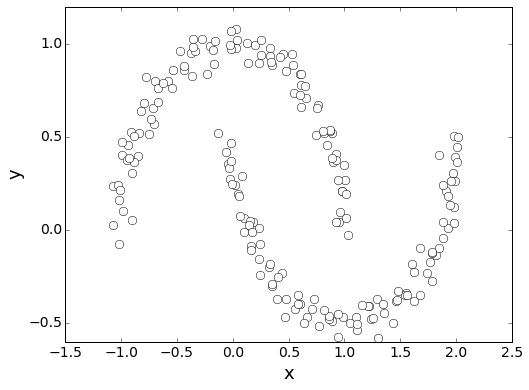

In [10]:
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
plt.plot(X[:, 0], X[:, 1], 'wo')
plt.xlabel('x')
plt.ylabel('y')

### K-Means

K-Means is an unsupervised learning techniques (prototype-based) that assigns samples to a specified number of clusters which the user pre-specifies. In scikit-learn the method can be initialized by either choosing n_clusters random sample points or by k-means++. Choosing random sample points can lead to slow convergence. Points are assigned to clusters based on their minimum Euclidean distance. The centriod of each cluster is then compute. The assignment process is then repeat using the new centriod distances. The sum of the squared errors is computed over the clusters. A maximum number of iterations or a threshold value cause the method to stop. Or none of the assignment change. One of the drawbacks of K-Means is that it yields spheroid clusters.

Typically the method is ran multiple times using different starting centroids and the final assignments are taken as those with the lowest SSE. With k-means++, the centroids are placed far away from each other. The elbow method is used to determine the number of clusters.

Note that distances are computed so the data should be standardized or scaled.

Fuzzy clustering (FCM) assigns samples to different clusters with a certain probability. It has been shown to give similar results as KM.

In [11]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, n_init=25, init='k-means++')
y_pred_km = km.fit_predict(X)

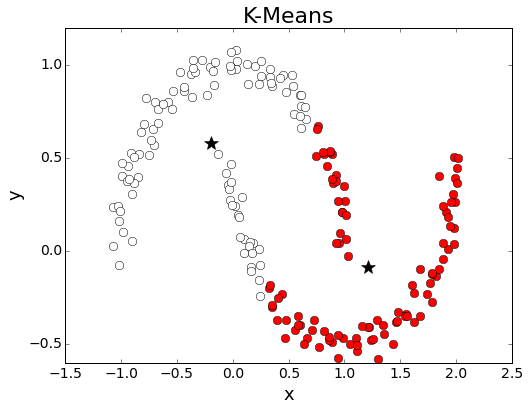

In [12]:
plt.plot(X[y_pred_km==0, 0], X[y_pred_km==0, 1], 'wo')
plt.plot(X[y_pred_km==1, 0], X[y_pred_km==1, 1], 'ro')
plt.plot(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], 'k*', ms=15)
plt.xlabel('x')
plt.ylabel('y')
plt.title('K-Means')

We see from the figure above that K-Means does not correctly recognize the clusters. This was expected since it produces spherical clusters.

### Agglomerative clusterings

This is a bottom-up hierarchical approach in contrast to divisive clusting which is top-down. There are different criteria for linking clusters together (e.g., complete, Ward, average, single). In the case of single, clusters are combined if they have the most similar members. In complete, clusters are combined if they have the minimum dissimilar members. Clusters are combined until all samples form a single cluster. Ward's criteria is based on the minimum SSE. One may make a dendrogram to illustrate how the merging tooke place.

In [13]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
ac = ac.fit(X)
y_pred_ac = ac.labels_

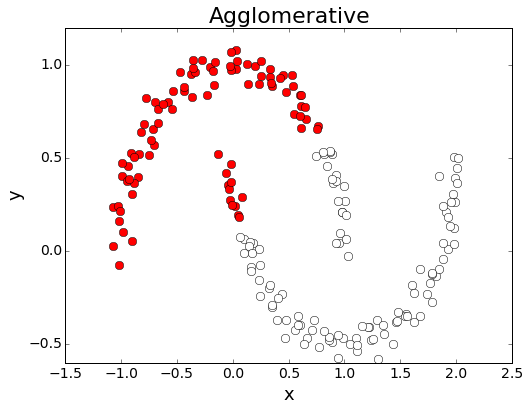

In [14]:
plt.plot(X[y_pred_ac==0, 0], X[y_pred_ac==0, 1], 'wo')
plt.plot(X[y_pred_ac==1, 0], X[y_pred_ac==1, 1], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Agglomerative')

We see from the figure above that agglomerative clustering failed to distinguish the two clusters.

### DBSCAN

The basic idea is to label points are core, border or noise. Core points have at least min_points within epsilon. Border points have fewer than min_points but lie within epsilon of a core point, and noise points have none. Form clusters of core points if within epsilon and their border points. This allows the method to produce clusters with a non-spherical shape. The method has two parameters that must be optimized. Like the previous methods it suffers from the curse of dimensionality as the number features grows large.

In [15]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_pred_db = db.fit_predict(X)

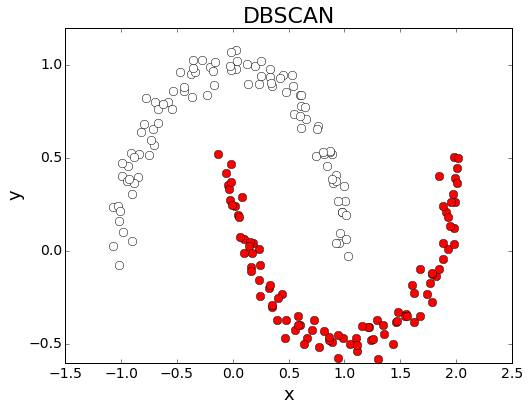

In [16]:
plt.plot(X[y_pred_db==0, 0], X[y_pred_db==0, 1], 'wo')
plt.plot(X[y_pred_db==1, 0], X[y_pred_db==1, 1], 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('DBSCAN')

In addition to prototype, hierarchical and density-based, there is a fourth type of clustering called graph-based clustering.